# Model Evaluation of a Naive Bayes Classification Model
Noah MacGillivray | BIT-446 Assignment(T5) | Summer 2025  
**Environment:** Ubuntu, VS Code

## Imports 

In [4]:
import pandas as pd
import numpy as np
import openpyxl
import os 
import matplotlib as plt 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            ConfusionMatrixDisplay)
import matplotlib.pyplot as plt


## Data Import
Displays the data frame info, head and tail to ensure proper import 

In [5]:
# read first 100 rows
failure_rate = pd.read_excel('BIT-446-RS-T4-T5-FailureRate.xlsx', nrows=300)  

# display df info
failure_rate.info()

# print head
print("\n", failure_rate.head())

# print tail
print("\n", failure_rate.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   record                   300 non-null    int64
 1   hours_run                300 non-null    int64
 2   avg_hours_between_maint  300 non-null    int64
 3   model_version            300 non-null    int64
 4   failure                  300 non-null    int64
dtypes: int64(5)
memory usage: 11.8 KB

    record  hours_run  avg_hours_between_maint  model_version  failure
0       1       1005                      382              3        0
1       2       1023                      380              1        0
2       3       1057                      319              1        0
3       4       1063                      566              3        0
4       5       1150                      767              1        0

      record  hours_run  avg_hours_between_maint  model_version  failu

## Define dataset

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        69
           1       1.00      0.29      0.44        21

    accuracy                           0.83        90
   macro avg       0.91      0.64      0.67        90
weighted avg       0.86      0.83      0.80        90


Confusion Matrix:
[[69  0]
 [15  6]]


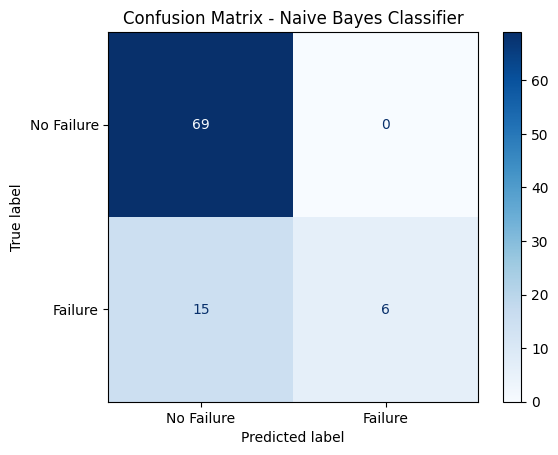

In [6]:
feature_columns = ['hours_run', 'avg_hours_between_maint', 'model_version']
x = failure_rate[feature_columns]   #Features
y = failure_rate.failure            #Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

# Create Gaussian classifier 
naive_clf = GaussianNB()

# Train the model
naive_clf.fit(x_train, y_train)

# Variable to hold the predictions for the model based on x_test
y_pred = naive_clf.predict(x_test)

# Generate the report
report = classification_report(y_test, y_pred)
print(report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

labels = ["No Failure", "Failure"]
# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()